In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
from IPython.display import display, HTML
import matplotlib.pyplot as plt

In [27]:
train = pd.read_csv('data/train_final.csv', index_col='id')
test = pd.read_csv('data/test_final.csv', index_col='id')
sample_sub = pd.read_csv('data/sample_submission.csv', index_col='id')

print(train.shape)
display(train.head())
print(test.shape)
display(test.head())
print(sample_sub.shape)
display(sample_sub.head())

print("--- Training data summaries ---")
print(train.describe())
print("--- Test data summaries ---")
print(test.describe())

(16383, 28)


,Y,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F18,F19,F20,F21,F22,F23,F24,F25,F26,F27
id,,,,,,,,,,,,,,,,,,,,,
1,1,38733,61385,0,38,118751,1000,32020,1,121980,...,1,118830,1,1,126461,1,46871,NaN,NaN,NaN
2,1,34248,51329,0,41,120800,1000,130630,1,124029,...,1,118832,1,1,130296,1,42386,NaN,NaN,NaN
3,1,15830,5522,0,50,118779,1000,303218,2,122006,...,1,118832,1,2,127063,1,23968,NaN,NaN,NaN
4,1,19417,6754,0,45,123163,2000,19024,1,126391,...,1,118832,1,1,15274,1,27555,NaN,NaN,NaN
5,1,42122,16991,0,41,119193,1000,303218,1,122422,...,1,118832,1,1,133491,1,50260,NaN,NaN,NaN


(16385, 24)


,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24
id,,,,,,,,,,,,,,,,,,,,,
16384,27991,135396,0,33,120578,17000,143022,1,124156,140341,...,1,128168,121276,1,122084,1,1,127696,1,36129
16385,82444,54655,0,38,120064,18000,315517,1,123643,138050,...,1,121648,120763,1,119703,1,2,127441,1,90582
16386,37950,23477,1,27,120267,1000,142929,1,123845,137960,...,1,314350,120965,1,119703,1,1,127029,1,46088
16387,75000,92055,0,33,118844,2000,130186,1,183832,128090,...,1,140144,180952,1,118961,1,1,127973,1,83138
16388,84243,8156,0,40,136613,2000,132071,1,139841,128051,...,1,121642,136961,1,118832,1,1,126927,1,92381


(16385, 1)


,Y
id,
16384,1.0
16385,0.0
16386,1.0
16387,0.5
16388,0.5


--- Training data summaries ---
                  Y             F1             F2            F3            F4  \
count  16383.000000   16383.000000   16383.000000  16383.000000  16383.000000   
mean       0.941464   44312.117256   26032.070927      0.048953     40.002991   
std        0.234762   34815.325971   35742.773305      0.281347      4.998992   
min        0.000000     999.000000      43.000000      0.000000     21.000000   
25%        1.000000   21896.000000    4603.000000      0.000000     37.000000   
50%        1.000000   36806.000000   13819.000000      0.000000     40.000000   
75%        1.000000   75414.000000   41799.500000      0.000000     43.000000   
max        1.000000  314150.000000  311733.000000      7.000000     59.000000   

                  F5            F6             F7            F8  \
count   16383.000000  1.638300e+04   16383.000000  16383.000000   
mean   121039.419459  6.272233e+03  201731.398767      1.043216   
std      5802.987367  1.124685e+05  1

In [28]:
# Remove null columns
train = train.dropna(axis=1, how='all')

# Split into data and labels
X = train.drop('Y', axis=1)
y = train['Y']

## Data visualization

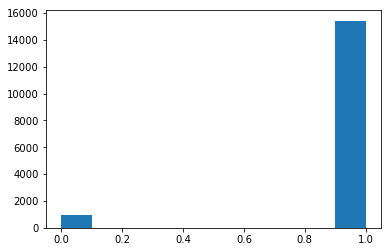

In [23]:
# Examine distribution of labels
plt.hist(y)
plt.show()

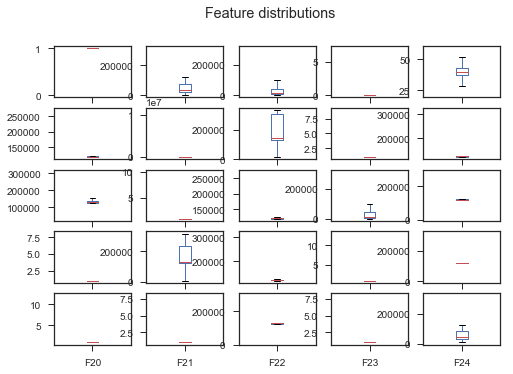

In [40]:
# Box whisker plots of data
train.plot(kind='box', subplots=True, title="Feature distributions", layout=(5,5), sharex=False, sharey=False)
plt.show()

KeyError: 'species'

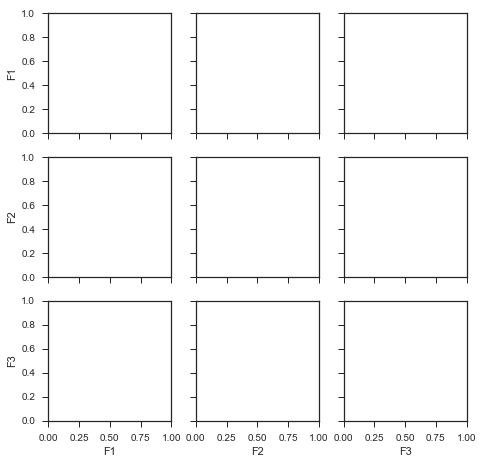

In [41]:
# Correlation plots
import seaborn as sns
sns.set(style="ticks")

sns.pairplot(train[["F1", "F2", "F3"]], hue="species")
plt.show()

## Now let's apply some models.

### Ridge Regression

In [4]:
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Parameters
alphas =  10**np.linspace(10,-2,100)*0.5
tuned_parameters = [{'alpha': alphas}]
n_folds = 10

# Setup model
clf = GridSearchCV(linear_model.Ridge(), tuned_parameters, cv=n_folds)
clf.fit(X, y)
best_alpha = clf.best_params_['alpha']

# Apply model
y_train_pred = clf.predict(X)
y_pred = clf.predict(test)
mse = mean_squared_error(y, y_train_pred)

# Results
print('--- RIDGE REGRESSION ---')
print('best alpha for ridge:', best_alpha)
print('MSE predicting on training data: {}'.format(mse))
print(y_train_pred)
print(y_pred)

/Users/Koger/anaconda/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 8.089263661917222e-17
  ' condition number: {}'.format(rcond), RuntimeWarning)
/Users/Koger/anaconda/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 3.5345487556745307e-17
  ' condition number: {}'.format(rcond), RuntimeWarning)
/Users/Koger/anaconda/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 3.067568034796338e-17
  ' condition number: {}'.format(rcond), RuntimeWarning)


--- RIDGE REGRESSION ---
best alpha for ridge: 163727.458144
MSE predicting on training data: 0.055036901204067915
[ 0.93910962  0.94237394  0.9447364  ...,  0.93715696  0.95273259  0.954564  ]
[ 0.93026348  0.93520173  0.93950159 ...,  0.93756677  0.93826795
  0.94038198]


/Users/Koger/anaconda/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 9.242218069189433e-18
  ' condition number: {}'.format(rcond), RuntimeWarning)
/Users/Koger/anaconda/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 9.809347410914283e-17
  ' condition number: {}'.format(rcond), RuntimeWarning)
/Users/Koger/anaconda/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.0208892487638984e-16
  ' condition number: {}'.format(rcond), RuntimeWarning)
/Users/Koger/anaconda/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-c

In [5]:
# Export ridge results to csv
df = pd.DataFrame({'id': test.index.values, 'Y': y_pred})
df.to_csv('submissions/ridge_submission.csv', columns = ['id','Y'], index=False)

### Lasso Regression

In [6]:
# Parameters
alphas =  10**np.linspace(10,-2,100)*0.5
tuned_parameters = [{'alpha': alphas}]
n_folds = 10

# Setup model
clf = GridSearchCV(linear_model.Lasso(), tuned_parameters, cv=n_folds)
clf.fit(X, y)
best_alpha = clf.best_params_['alpha']

# Apply model
y_train_pred = clf.predict(X)
mse = mean_squared_error(y, y_train_pred)
y_pred = clf.predict(test)

# Results
print('--- LASSO REGRESSION ---')
print('best alpha for lasso:', best_alpha)
print('MSE predicting on training data: {}'.format(mse))
print(y_train_pred)
print(y_pred)

/Users/Koger/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


--- LASSO REGRESSION ---
best alpha for lasso: 115.506485004
MSE predicting on training data: 0.055098738955581116
[ 0.94074153  0.9408437   0.93977089 ...,  0.93977089  0.94417163
  0.94520408]
[ 0.94061845  0.93984313  0.94517169 ...,  0.94047319  0.94039067
  0.93977089]


In [7]:
# Export lasso results to csv
df = pd.DataFrame({'id': test.index.values, 'Y': y_pred})
df.to_csv('submissions/lasso_submission.csv', columns = ['id','Y'], index=False)

### Logistic Regression

In [8]:
# Parameters
C = [0.01, 0.1, 1, 10 ,100]
tuned_parameters = [{'C': C}]
n_folds = 10

# Setup model
clf = GridSearchCV(linear_model.LogisticRegression(), tuned_parameters, cv=n_folds)
clf.fit(X,y)
best_c = clf.best_params_['C']

# Apply model
y_train_pred = clf.predict(X)
mse = mean_squared_error(y, y_train_pred)
y_pred = clf.predict(test)

# Results
print('--- LASSO REGRESSION ---')
print('best C for logistic regression:', best_c)
print('MSE predicting on training data: {}'.format(mse))
print(y_train_pred)
print(y_pred)

--- LASSO REGRESSION ---
best C for logistic regression: 0.01
MSE predicting on training data: 0.05853628761521089
[1 1 1 ..., 1 1 1]
[1 1 1 ..., 1 1 1]


In [9]:
# Export logistic regression results to csv
df = pd.DataFrame({'id': test.index.values, 'Y': y_pred})
df.to_csv('submissions/logistic_submission.csv', columns = ['id','Y'], index=False)

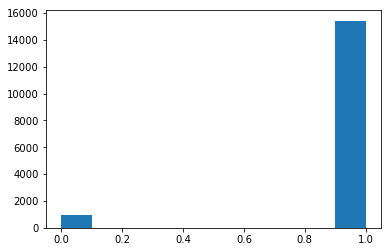